In [1]:
import pandas as pd

input_file = 'references.csv'
df = pd.read_csv(input_file)

author_reference_counts = df['full_author_referenced'].value_counts()

top_5_referenced_authors = author_reference_counts.head(400)

print("Most Referenced Authors:")
for author, count in top_5_referenced_authors.items():
    print(f"{author}: {count} references")

Most Referenced Authors:
Plato: 15725 references
Aristotle: 8997 references
Augustine: 5578 references
Kant, Immanuel: 4710 references
Whitefield, George: 4409 references
Homer: 3156 references
Locke, John: 2643 references
Nietzsche, Friedrich Wilhelm: 2595 references
Cicero: 1963 references
Spinoza, Benedictus de: 1840 references
Plutarch: 1772 references
Melanchthon, Philipp: 1763 references
Newton, Isaac: 1724 references
Descartes: 1716 references
Schopenhauer, Arthur: 1695 references
Hegel, Georg Wilhelm Friedrich: 1591 references
Origen: 1544 references
Voltaire: 1411 references
Hume, David: 1252 references
Seneca, Lucius Annaeus: 1067 references
Paine, Thomas: 1052 references
Xenophon: 1025 references
Pascal, Blaise: 987 references
Leibniz, Gottfried Wilhelm, Freiherr von: 950 references
Maimonides, Moses: 932 references
Rousseau, Jean-Jacques: 926 references
Erasmus: 914 references
Hobbes, Thomas: 911 references
Ibn Tufayl, Muhammad ibn 'Abd al-Malik: 856 references
Renan, Ernes

In [7]:
unique_authors = df['full_author_referenced'].unique()

total_unique_authors = len(unique_authors)

print(f"Total number of unique authors referenced: {total_unique_authors}")

Total number of unique authors referenced: 403


In [8]:
author_reference_counts = df['full_author_referenced'].value_counts()

total_references = author_reference_counts.sum()

median_references = author_reference_counts.median()
lower_quartile = author_reference_counts.quantile(0.25)
upper_quartile = author_reference_counts.quantile(0.75)

print(f"Total number of references: {total_references}")
print(f"Median number of references: {median_references}")
print(f"Lower quartile (Q1): {lower_quartile}")
print(f"Upper quartile (Q3): {upper_quartile}")

Total number of references: 109691
Median number of references: 34.0
Lower quartile (Q1): 9.0
Upper quartile (Q3): 138.0


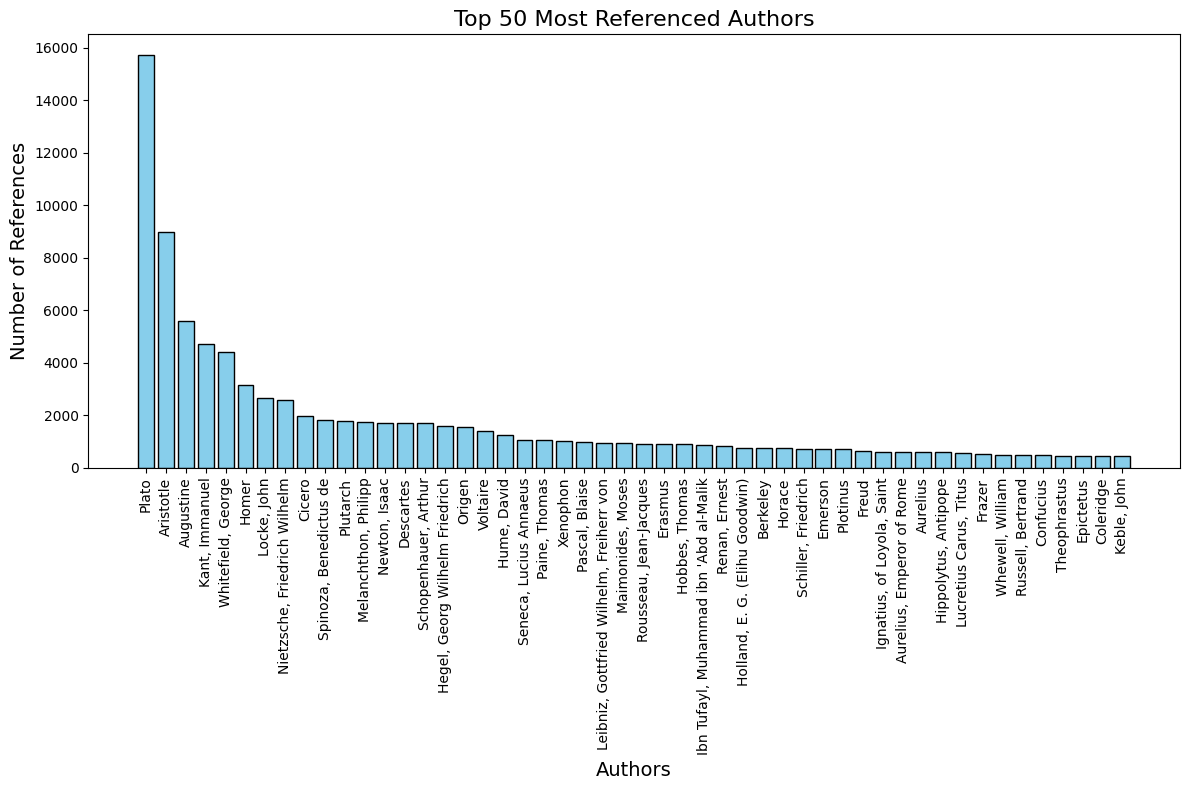

In [9]:
import matplotlib.pyplot as plt
author_reference_counts = df['full_author_referenced'].value_counts()

top_50_authors = author_reference_counts.head(50)

plt.figure(figsize=(12, 8))
plt.bar(top_50_authors.index, top_50_authors.values, color='skyblue', edgecolor='black')

plt.title('Top 50 Most Referenced Authors', fontsize=16)
plt.xlabel('Authors', fontsize=14)
plt.ylabel('Number of References', fontsize=14)

plt.xticks(rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
input_file = 'references.csv' 
df = pd.read_csv(input_file)
author_reference_counts = df['full_author_referenced'].value_counts()
top_authors = author_reference_counts.head(50)

print("Top 5 most referenced authors as a sample:")
print(top_authors.head())


Top 5 most referenced authors as a sample:
full_author_referenced
Plato                 15725
Aristotle              8997
Augustine              5578
Kant, Immanuel         4710
Whitefield, George     4409
Name: count, dtype: int64


In [4]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

embeddings = []

with torch.no_grad():
    for author in top_authors.index:
        inputs = tokenizer(author, return_tensors='pt', padding=True, truncation=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        
        outputs = model(**inputs)
        
        embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(embedding[0])

embeddings = np.array(embeddings)
print(f"Generated embeddings shape: {embeddings.shape}")

Generated embeddings shape: (50, 768)


/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


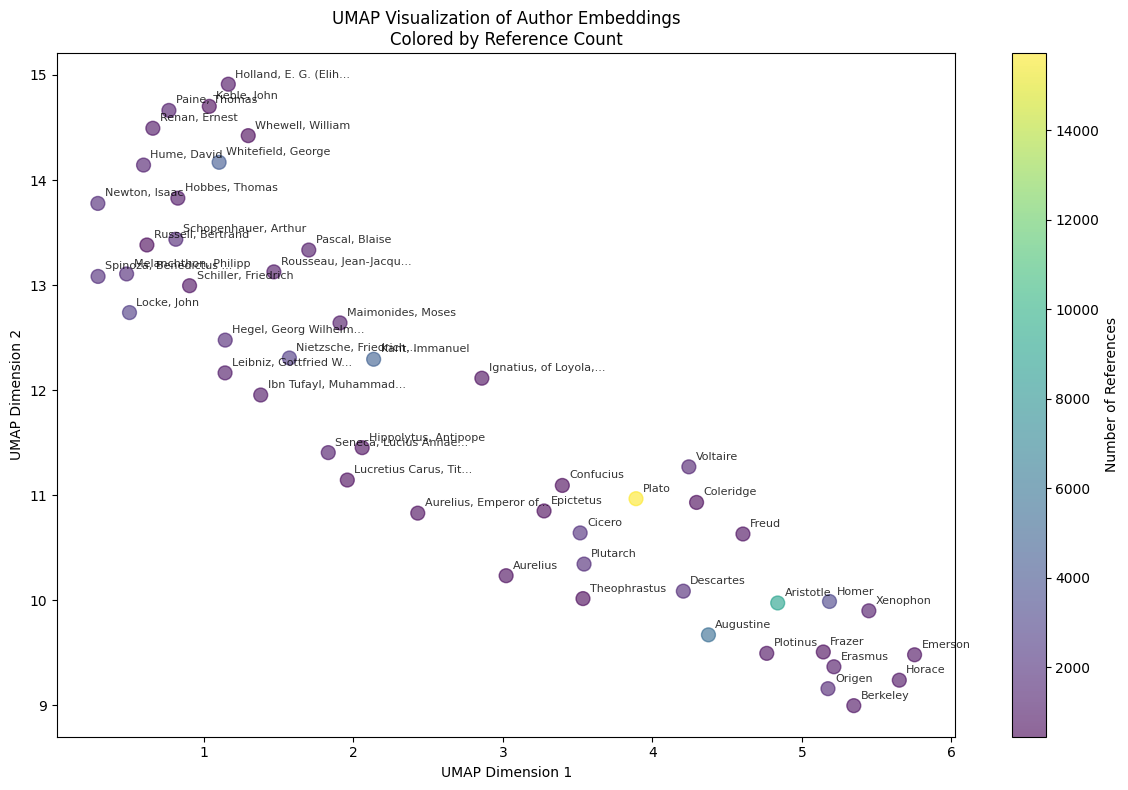

In [5]:
umap = UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embeddings_2d = umap.fit_transform(embeddings)

plot_df = pd.DataFrame({
    'UMAP1': embeddings_2d[:, 0],
    'UMAP2': embeddings_2d[:, 1],
    'Author': top_authors.index,
    'References': top_authors.values
})

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    plot_df['UMAP1'], 
    plot_df['UMAP2'],
    c=plot_df['References'],
    cmap='viridis',
    s=100,
    alpha=0.6
)

for idx, row in plot_df.iterrows():
    plt.annotate(
        row['Author'][:20] + '...' if len(row['Author']) > 20 else row['Author'],
        (row['UMAP1'], row['UMAP2']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        alpha=0.8
    )

plt.colorbar(scatter, label='Number of References')
plt.title('UMAP Visualization of Author Embeddings\nColored by Reference Count')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.tight_layout()
plt.show()

plt.savefig('author_embeddings_umap.png', dpi=300, bbox_inches='tight')
plt.savefig('author_embeddings_umap.png', dpi=300, bbox_inches='tight')
plt.close()


/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


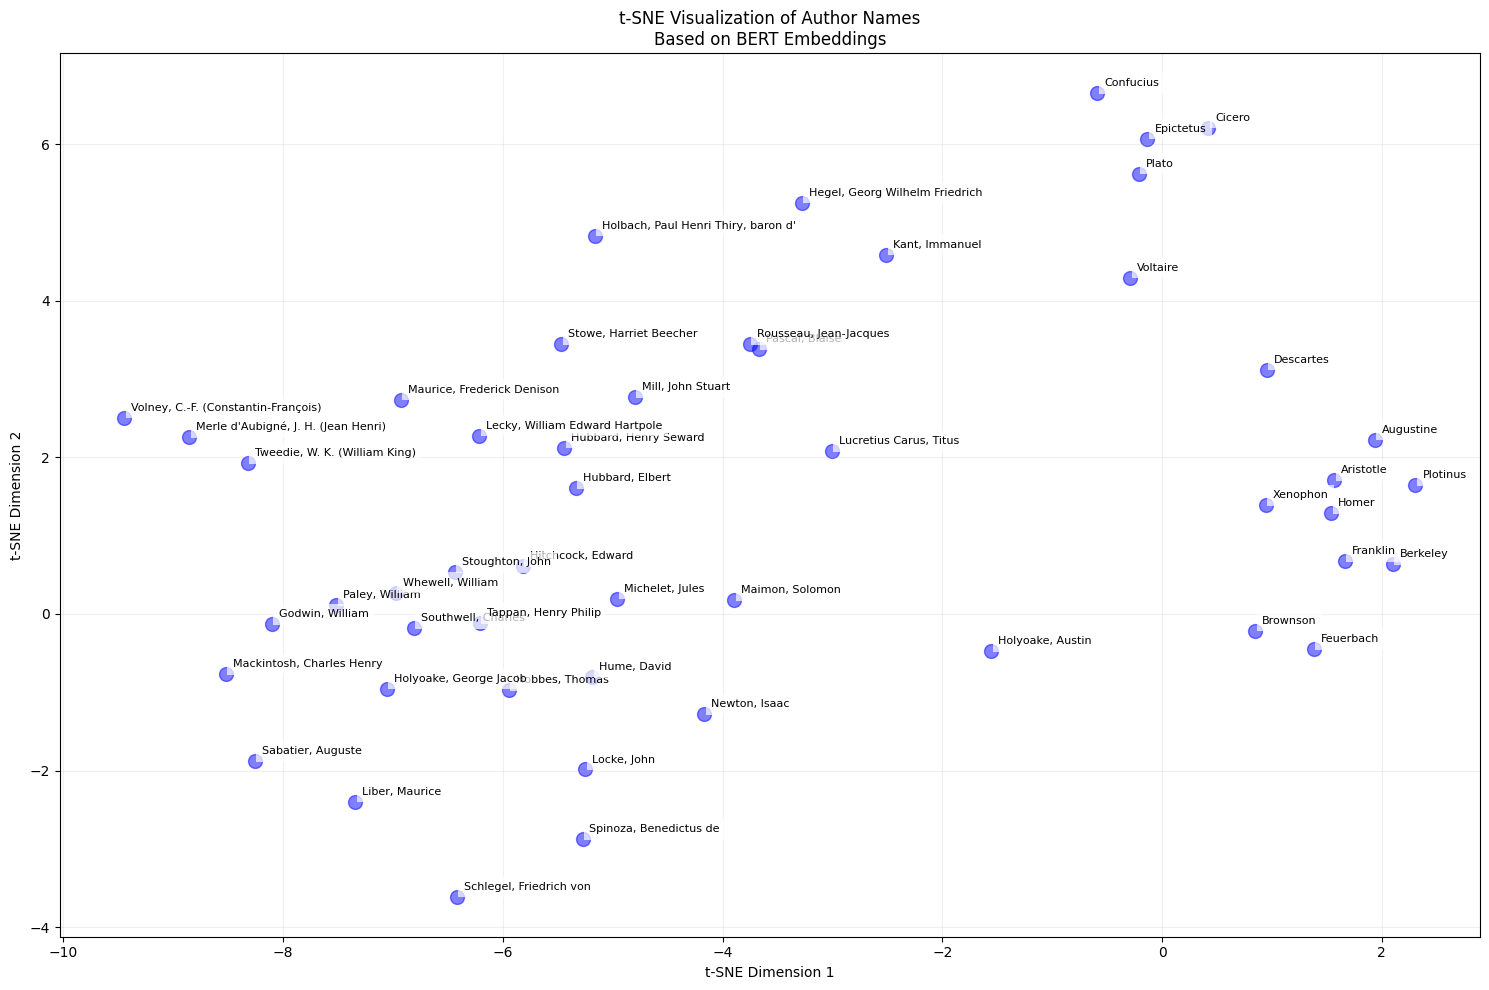

In [6]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

input_file = 'references.csv'
df = pd.read_csv(input_file)
unique_authors = df['full_author_referenced'].unique()
top_authors = unique_authors[:50] 

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

embeddings = []
with torch.no_grad():
    for author in top_authors:
        inputs = tokenizer(author, return_tensors='pt', padding=True, truncation=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(embedding[0])

embeddings = np.array(embeddings)

tsne = TSNE(
    n_components=2,
    perplexity=15,
    n_iter=2000,
    random_state=42
)
embeddings_2d = tsne.fit_transform(embeddings)

plot_df = pd.DataFrame({
    'tSNE1': embeddings_2d[:, 0],
    'tSNE2': embeddings_2d[:, 1],
    'Author': top_authors
})

plt.figure(figsize=(15, 10))

plt.scatter(
    plot_df['tSNE1'], 
    plot_df['tSNE2'],
    c='blue',
    s=100,
    alpha=0.5
)

for idx, row in plot_df.iterrows():
    plt.annotate(
        row['Author'],
        (row['tSNE1'], row['tSNE2']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

plt.title('t-SNE Visualization of Author Names\nBased on BERT Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Optimal number of clusters: 2


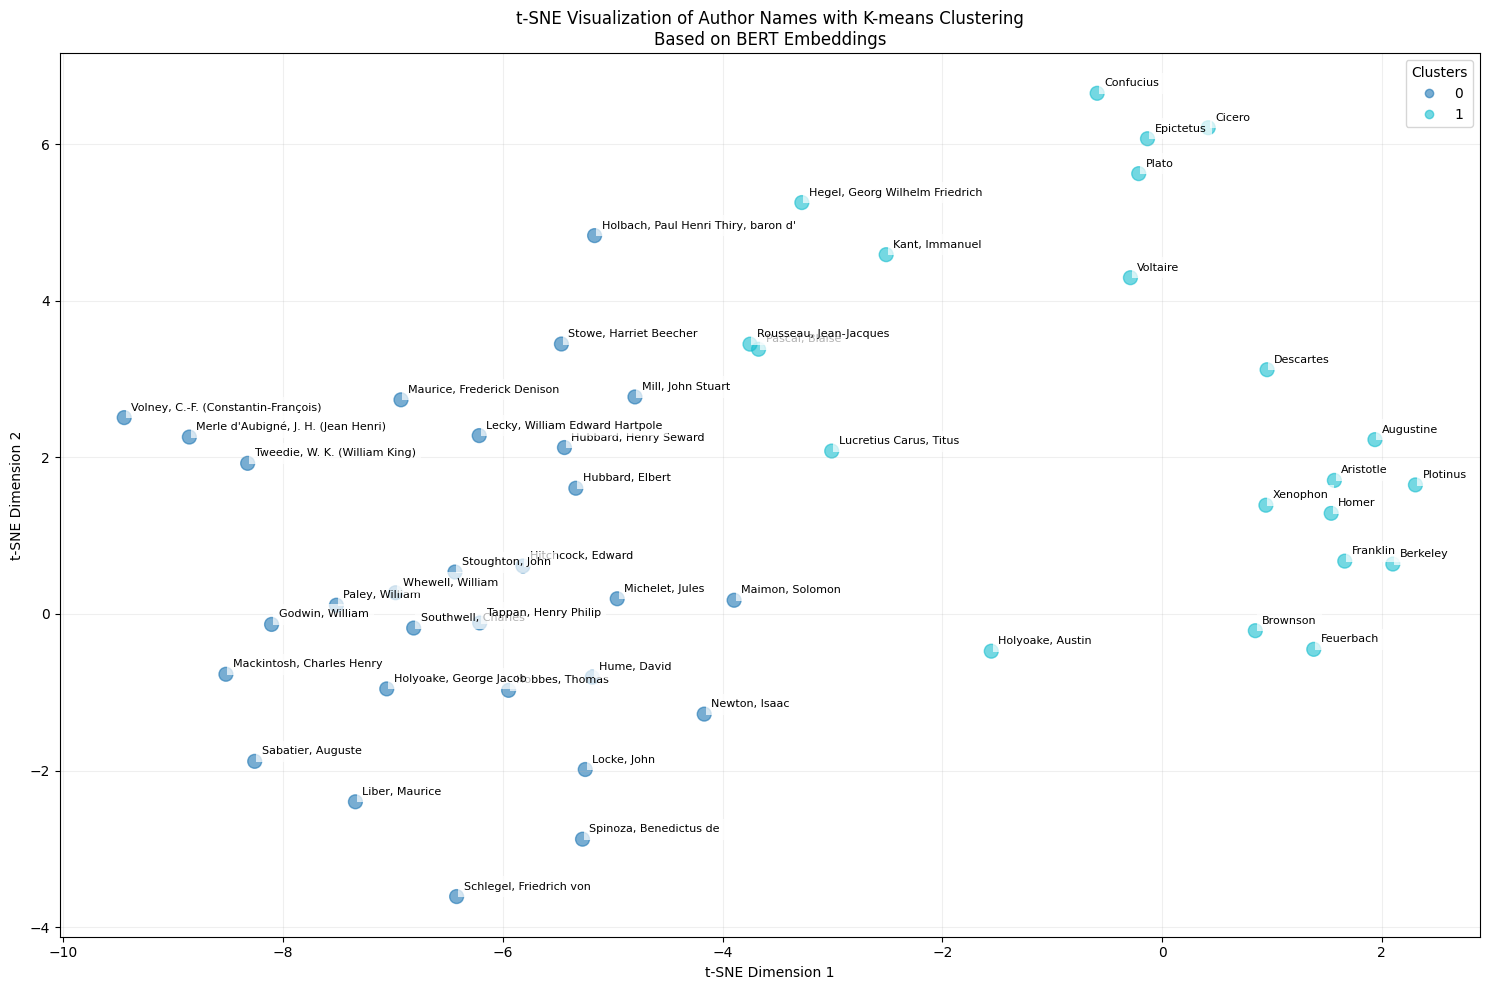


Cluster Analysis:

Cluster 0:
Authors: Godwin, William, Hitchcock, Edward, Hobbes, Thomas, Holbach, Paul Henri Thiry, baron d', Holyoake, George Jacob, Hubbard, Elbert, Hubbard, Henry Seward, Hume, David, Liber, Maurice, Locke, John, Mackintosh, Charles Henry, Maimon, Solomon, Maurice, Frederick Denison, Merle d'Aubigné, J. H. (Jean Henri), Michelet, Jules, Mill, John Stuart, Newton, Isaac, Paley, William, Sabatier, Auguste, Schlegel, Friedrich von, Southwell, Charles, Spinoza, Benedictus de, Stoughton, John, Stowe, Harriet Beecher, Tappan, Henry Philip, Tweedie, W. K. (William King), Volney, C.-F. (Constantin-François), Whewell, William, Lecky, William Edward Hartpole
Size: 29 authors

Cluster 1:
Authors: Aristotle, Augustine, Berkeley, Brownson, Cicero, Descartes, Franklin, Hegel, Georg Wilhelm Friedrich, Holyoake, Austin, Kant, Immanuel, Lucretius Carus, Titus, Pascal, Blaise, Plato, Plotinus, Rousseau, Jean-Jacques, Voltaire, Xenophon, Confucius, Epictetus, Feuerbach, Homer
Size: 

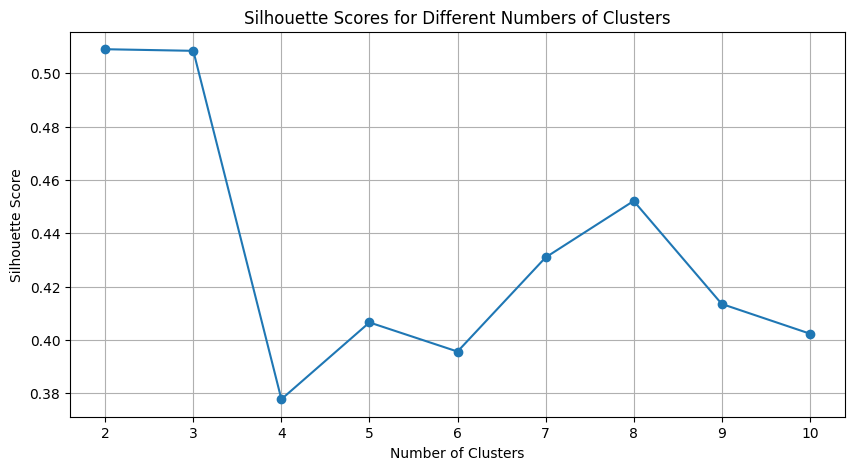

In [7]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

input_file = 'references.csv'
df = pd.read_csv(input_file)
unique_authors = df['full_author_referenced'].unique()
top_authors = unique_authors[:50]

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

embeddings = []
with torch.no_grad():
    for author in top_authors:
        inputs = tokenizer(author, return_tensors='pt', padding=True, truncation=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(embedding[0])

embeddings = np.array(embeddings)

tsne = TSNE(n_components=2, perplexity=15, n_iter=2000, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

max_clusters = 10
silhouette_scores = []
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(embeddings_2d)
    score = silhouette_score(embeddings_2d, clusters)
    silhouette_scores.append(score)

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(embeddings_2d)

plot_df = pd.DataFrame({
    'tSNE1': embeddings_2d[:, 0],
    'tSNE2': embeddings_2d[:, 1],
    'Author': top_authors,
    'Cluster': clusters
})

plt.figure(figsize=(15, 10))

scatter = plt.scatter(
    plot_df['tSNE1'], 
    plot_df['tSNE2'],
    c=plot_df['Cluster'],
    cmap='tab10',
    s=100,
    alpha=0.6
)

for idx, row in plot_df.iterrows():
    plt.annotate(
        row['Author'],
        (row['tSNE1'], row['tSNE2']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

plt.title('t-SNE Visualization of Author Names with K-means Clustering\nBased on BERT Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True, alpha=0.2)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.tight_layout()
plt.show()

print("\nCluster Analysis:")
for cluster in range(optimal_k):
    cluster_authors = plot_df[plot_df['Cluster'] == cluster]['Author'].tolist()
    print(f"\nCluster {cluster}:")
    print("Authors:", ", ".join(cluster_authors))
    print(f"Size: {len(cluster_authors)} authors")

plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


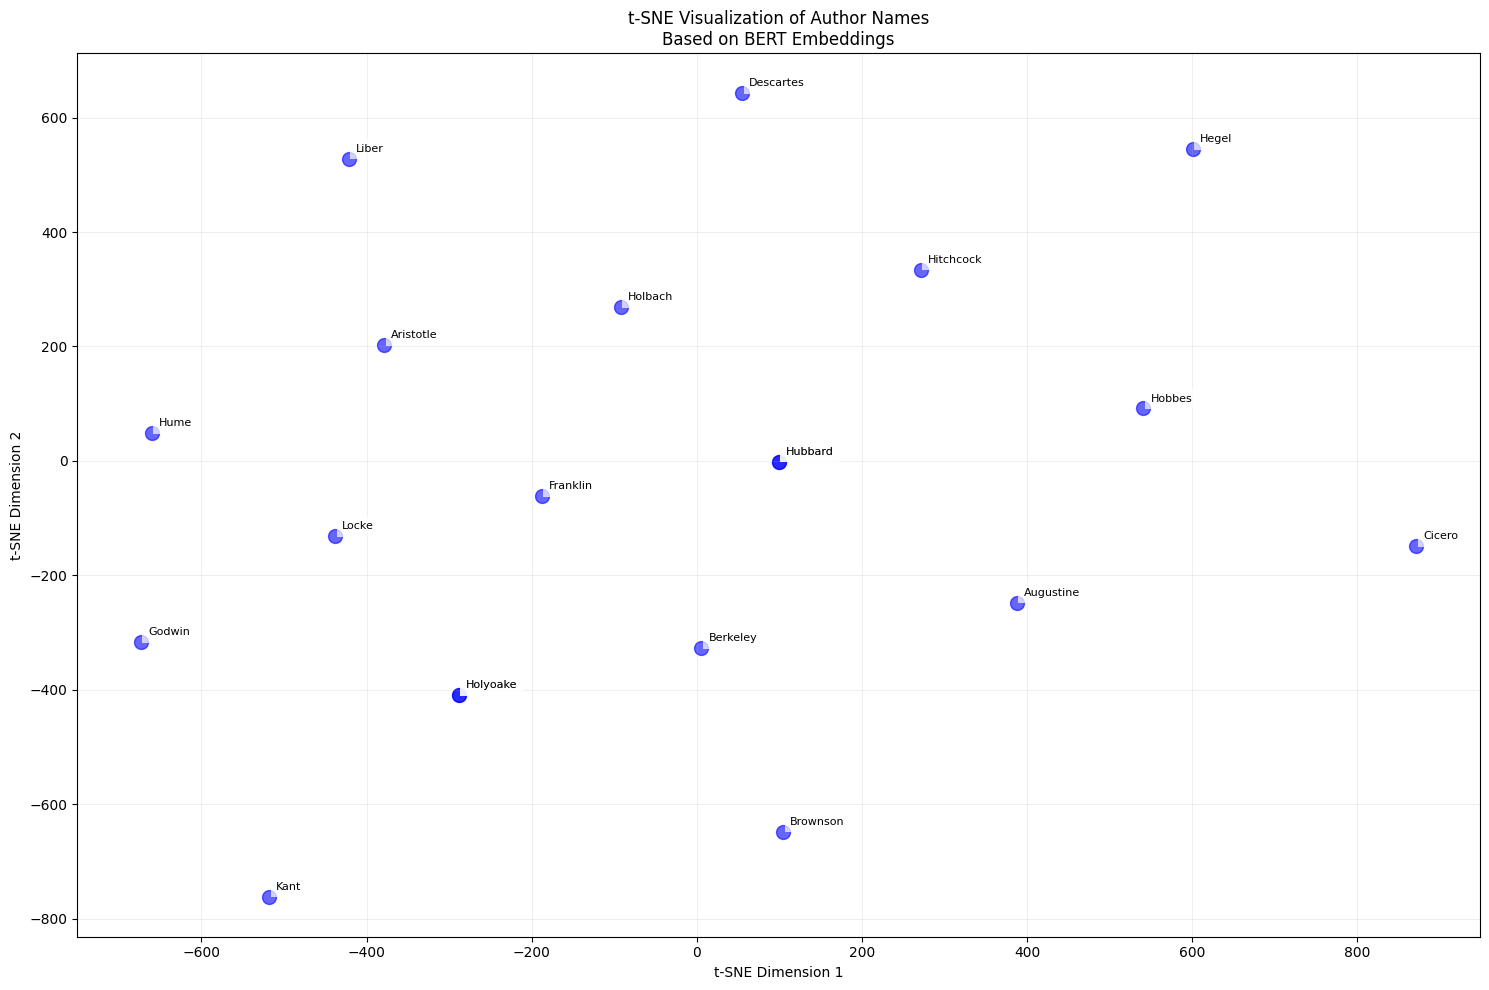

In [13]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

input_file = 'references.csv'
df = pd.read_csv(input_file)
unique_authors = df['full_author_referenced'].unique()
top_authors = unique_authors[:20]

processed_authors = [name.split(',')[0].strip() for name in top_authors]

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

embeddings = []
with torch.no_grad():
    for author in processed_authors:
        inputs = tokenizer(author, return_tensors='pt', padding=True, truncation=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(embedding[0])

embeddings = np.array(embeddings)

tsne = TSNE(n_components=2, perplexity=15, n_iter=2000, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

plot_df = pd.DataFrame({
    'tSNE1': embeddings_2d[:, 0],
    'tSNE2': embeddings_2d[:, 1],
    'Author': processed_authors
})

plt.figure(figsize=(15, 10))

plt.scatter(
    plot_df['tSNE1'], 
    plot_df['tSNE2'],
    c='blue',
    s=100,
    alpha=0.6
)

for idx, row in plot_df.iterrows():
    plt.annotate(
        row['Author'],
        (row['tSNE1'], row['tSNE2']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

plt.title('t-SNE Visualization of Author Names\nBased on BERT Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True, alpha=0.2)
plt.tight_layout()

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


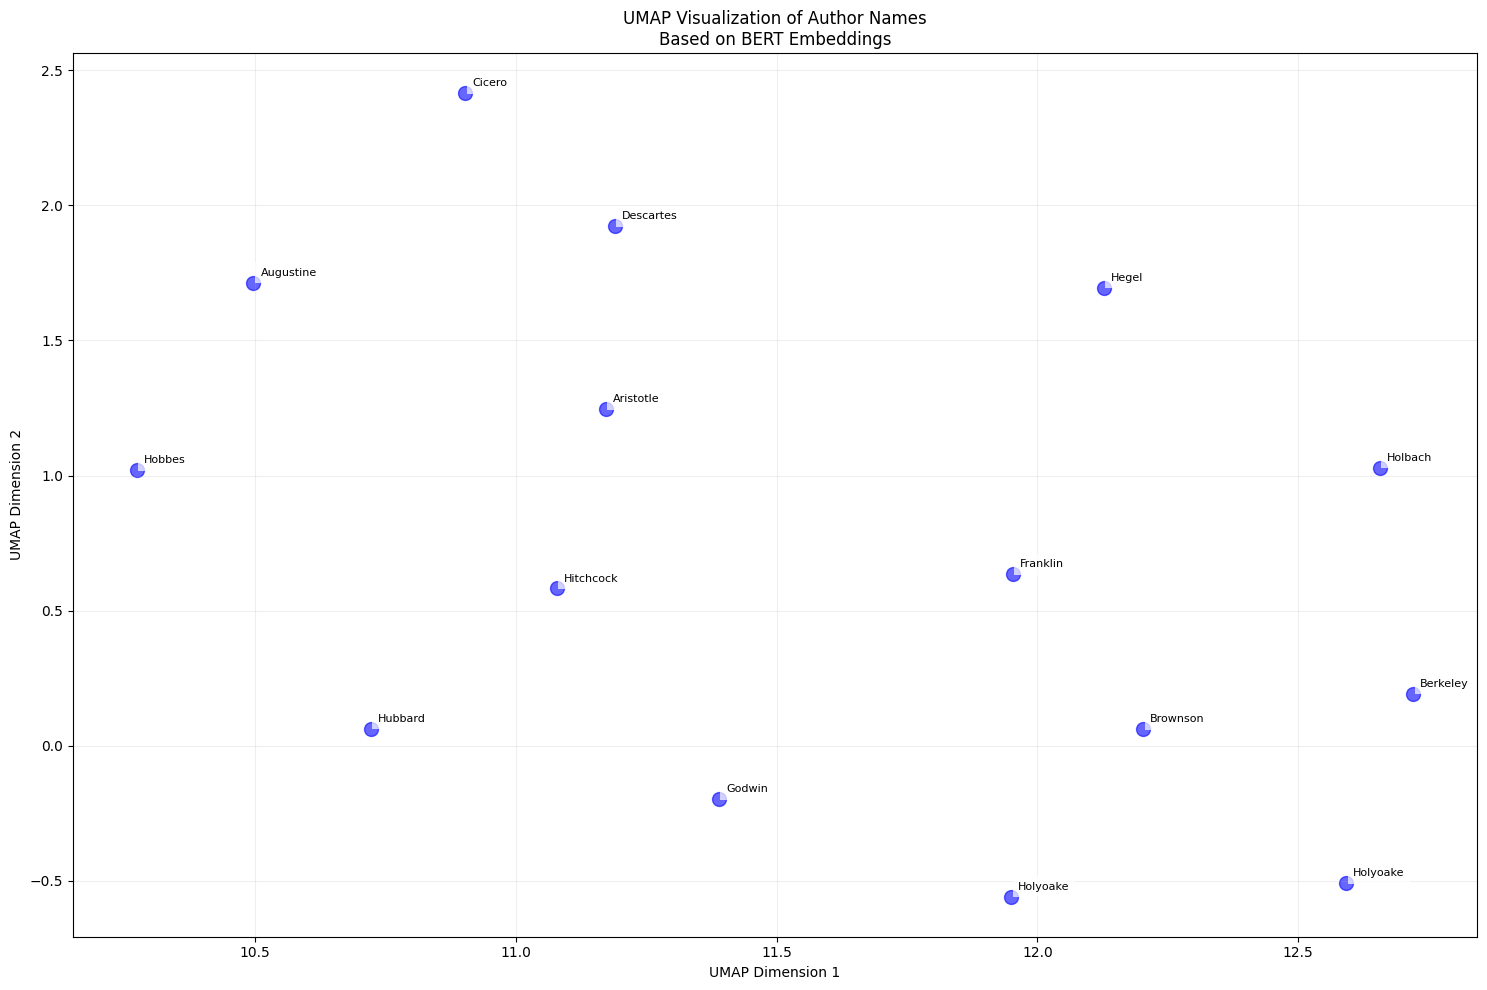

In [11]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
import umap
import matplotlib.pyplot as plt

input_file = 'references.csv'
df = pd.read_csv(input_file)
unique_authors = df['full_author_referenced'].unique()
top_authors = unique_authors[:15]

processed_authors = [name.split(',')[0].strip() for name in top_authors]

#  BERT embeddings
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

embeddings = []
with torch.no_grad():
    for author in processed_authors:
        inputs = tokenizer(author, return_tensors='pt', padding=True, truncation=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(embedding[0])

embeddings = np.array(embeddings)

reducer = umap.UMAP(
    n_neighbors=15,    
    min_dist=0.1,      
    n_components=2,   
    random_state=42
)
embeddings_2d = reducer.fit_transform(embeddings)

#  DataFrame for plotting
plot_df = pd.DataFrame({
    'UMAP1': embeddings_2d[:, 0],
    'UMAP2': embeddings_2d[:, 1],
    'Author': processed_authors
})

# visualization
plt.figure(figsize=(15, 10))

# scatter plot
plt.scatter(
    plot_df['UMAP1'], 
    plot_df['UMAP2'],
    c='blue',
    s=100,
    alpha=0.6
)

for idx, row in plot_df.iterrows():
    plt.annotate(
        row['Author'],
        (row['UMAP1'], row['UMAP2']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

plt.title('UMAP Visualization of Author Names\nBased on BERT Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


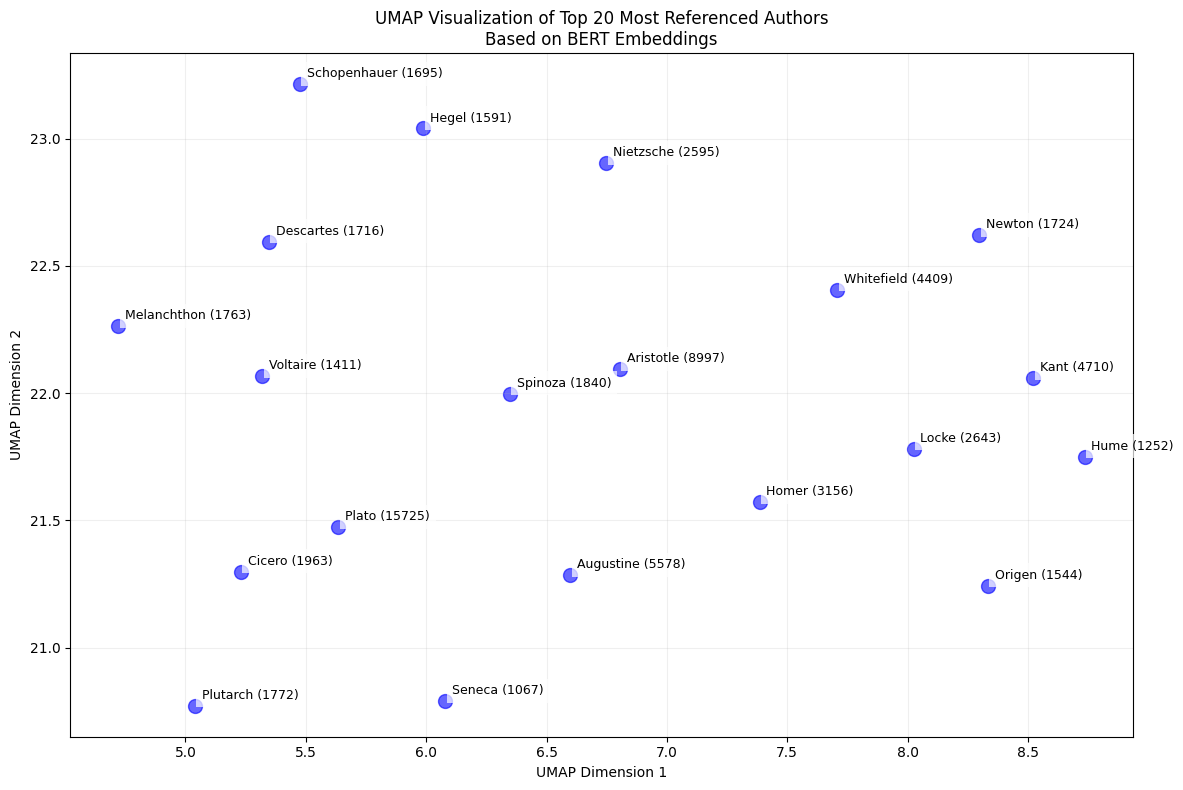

In [14]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
import umap
import matplotlib.pyplot as plt

input_file = 'references.csv'
df = pd.read_csv(input_file)
author_counts = df['full_author_referenced'].value_counts()
top_authors = author_counts.head(20).index.tolist()
processed_authors = [name.split(',')[0].strip() for name in top_authors]


tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

embeddings = []
with torch.no_grad():
    for author in processed_authors:
        inputs = tokenizer(author, return_tensors='pt', padding=True, truncation=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(embedding[0])

embeddings = np.array(embeddings)


reducer = umap.UMAP(
    n_neighbors=10,    
    min_dist=0.1,
    n_components=2,
    random_state=42
)
embeddings_2d = reducer.fit_transform(embeddings)


plot_df = pd.DataFrame({
    'UMAP1': embeddings_2d[:, 0],
    'UMAP2': embeddings_2d[:, 1],
    'Author': processed_authors,
    'Reference_Count': author_counts.head(20).values
})


plt.figure(figsize=(12, 8))
plt.scatter(
    plot_df['UMAP1'], 
    plot_df['UMAP2'],
    c='blue',
    s=100,
    alpha=0.6
)

for idx, row in plot_df.iterrows():
    plt.annotate(
        f"{row['Author']} ({row['Reference_Count']})",
        (row['UMAP1'], row['UMAP2']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

plt.title('UMAP Visualization of Top 20 Most Referenced Authors\nBased on BERT Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


/Users/robertbecker/Desktop/phil_latest/bertopic_env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


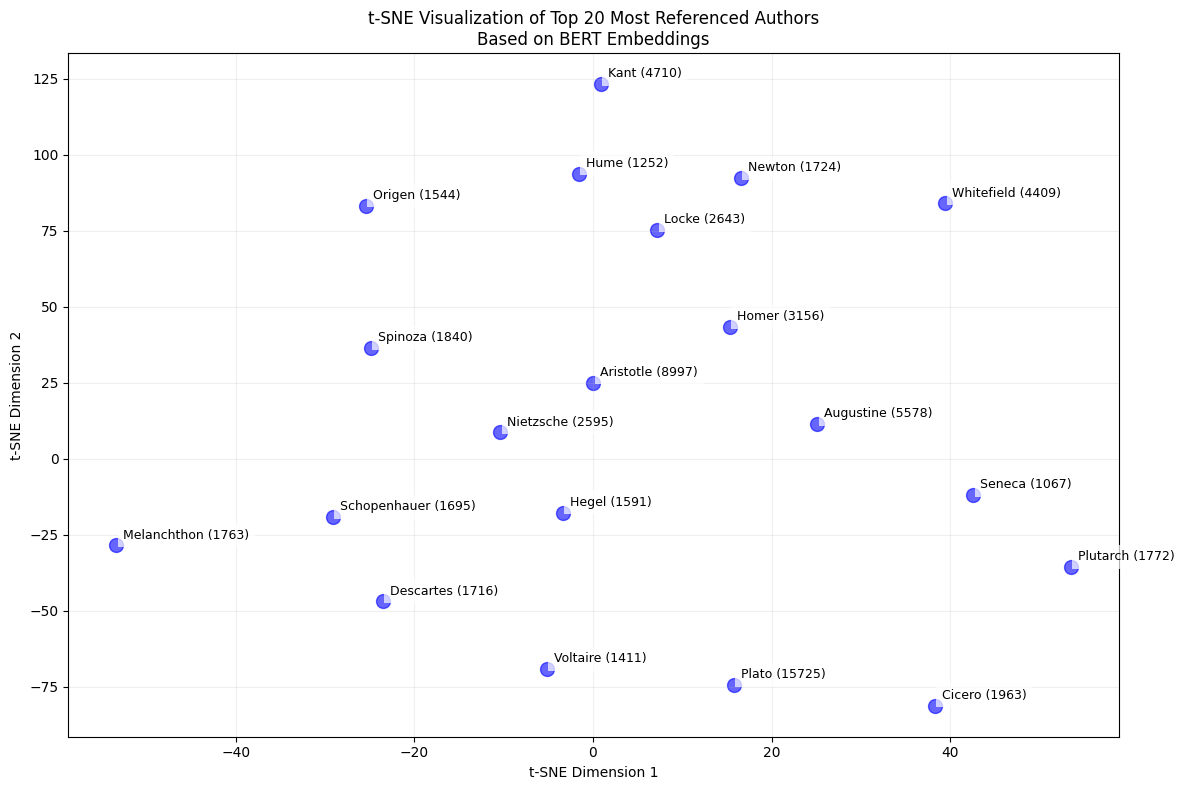

In [15]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


input_file = 'references.csv'
df = pd.read_csv(input_file)

author_counts = df['full_author_referenced'].value_counts()
top_authors = author_counts.head(20).index.tolist()
processed_authors = [name.split(',')[0].strip() for name in top_authors]

# Get BERT embeddings
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

embeddings = []
with torch.no_grad():
    for author in processed_authors:
        inputs = tokenizer(author, return_tensors='pt', padding=True, truncation=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(embedding[0])

embeddings = np.array(embeddings)

# Apply t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=5,  # Reduced perplexity for smaller dataset
    n_iter=2000,
    random_state=42
)
embeddings_2d = tsne.fit_transform(embeddings)

# Create DataFrame for plotting
plot_df = pd.DataFrame({
    'tSNE1': embeddings_2d[:, 0],
    'tSNE2': embeddings_2d[:, 1],
    'Author': processed_authors,
    'Reference_Count': author_counts.head(20).values
})


plt.figure(figsize=(12, 8))
plt.scatter(
    plot_df['tSNE1'], 
    plot_df['tSNE2'],
    c='blue',
    s=100,
    alpha=0.6
)

for idx, row in plot_df.iterrows():
    plt.annotate(
        f"{row['Author']} ({row['Reference_Count']})",
        (row['tSNE1'], row['tSNE2']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

plt.title('t-SNE Visualization of Top 20 Most Referenced Authors\nBased on BERT Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()